In [1]:
%cd "/content/drive/MyDrive/My Projects/face-verification-with-siamese-network"

/content/drive/MyDrive/My Projects/face-verification-with-siamese-network


In [2]:
!pip install import-ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=a2e26bab89b184ce3238f4172eb7ddfde8f9e1d6470f7d95e15f3132238dcf79
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb


In [3]:
import import_ipynb

import config
import utils
from tensorflow.keras.models import load_model
from imutils.paths import list_images
import matplotlib.pyplot as plt
import numpy as np
import cv2

importing Jupyter notebook from config.ipynb
importing Jupyter notebook from utils.ipynb


In [24]:
testImagePaths = list(list_images("samples"))

# np.random.seed(42)
pairs = np.random.choice(testImagePaths, size=(10, 2))

model = load_model(config.MODEL_PATH, compile=False)

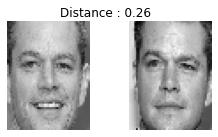

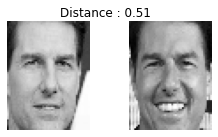

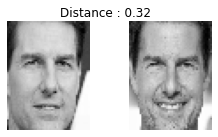

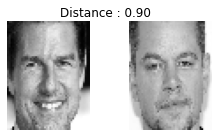

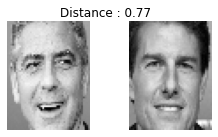

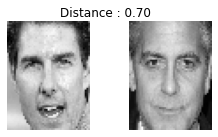

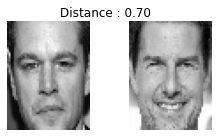

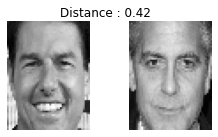

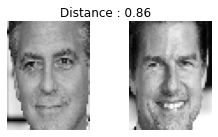

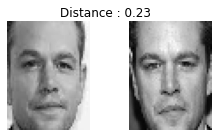

In [25]:
for (i, (pathA, pathB)) in enumerate(pairs):
  imageA = cv2.imread(pathA, 0)
  imageB = cv2.imread(pathB, 0)

  origA = imageA.copy()
  origB = imageB.copy()

  imageA = np.expand_dims(imageA, axis = 0)
  imageB = np.expand_dims(imageB, axis = 0)

  imageA = imageA / 255.0
  imageB = imageB / 255.0

  preds = model.predict([imageA, imageB])
  proba = preds[0][0] 

  fig = plt.figure("pair #{}".format(i + 1) , figsize=(4, 2))
  plt.suptitle("Distance : {:.2f}".format(proba))

  ax = plt.subplot(1, 2 ,1)
  plt.imshow(origA, cmap=plt.cm.gray)
  plt.axis("off")

  ax = plt.subplot(1, 2 ,2)
  plt.imshow(origB, cmap=plt.cm.gray)
  plt.axis("off")

  # fig.savefig("output/contrastive-loss/result-{}".format(i))
  plt.show()
  